In [1]:
# https://www.kaggle.com/mlg-ulb/creditcardfraud
!pip install h2o

  Created wheel for h2o: filename=h2o-3.32.0.3-py2.py3-none-any.whl size=164649670 sha256=9f39f62a3b6d381f8c017c7fa2e6197f8758053f1c32edcda1eecee4d31a0cd2
  Stored in directory: c:\users\uba_p\appdata\local\pip\cache\wheels\ff\74\dd\22b44c24f6014bd395f787198c069e11f9c2151748a17093f3
Successfully built h2o


In [1]:
import h2o
from h2o.estimators import H2OKMeansEstimator
from h2o.estimators import H2ORandomForestEstimator
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

h2o.init(ip="localhost", port=54323)

Checking whether there is an H2O instance running at http://localhost:54323 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.271-b09, mixed mode)
  Starting server from C:\Users\uba_p\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\uba_p\AppData\Local\Temp\tmpgxbzfoig
  JVM stdout: C:\Users\uba_p\AppData\Local\Temp\tmpgxbzfoig\h2o_uba_p_started_from_python.out
  JVM stderr: C:\Users\uba_p\AppData\Local\Temp\tmpgxbzfoig\h2o_uba_p_started_from_python.err
  Server is running at http://127.0.0.1:54323
Connecting to H2O server at http://127.0.0.1:54323 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Europe/Paris
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.3
H2O_cluster_version_age:,1 month and 3 days
H2O_cluster_name:,H2O_from_python_uba_p_v9qbbd
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.533 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"accepting new members, healthy"


In [11]:
transactions = h2o.import_file("creditcard.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [5]:
transactions.head()

Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.35981,-0.0727812,2.53635,1.37816,-0.338321,0.462388,0.239599,0.0986979,0.363787,0.0907942,-0.5516,-0.617801,-0.99139,-0.311169,1.46818,-0.470401,0.207971,0.0257906,0.403993,0.251412,-0.0183068,0.277838,-0.110474,0.0669281,0.128539,-0.189115,0.133558,-0.0210531,149.62,0
0,1.19186,0.266151,0.16648,0.448154,0.0600176,-0.0823608,-0.078803,0.0851017,-0.255425,-0.166974,1.61273,1.06524,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.0690831,-0.225775,-0.638672,0.101288,-0.339846,0.16717,0.125895,-0.0089831,0.0147242,2.69,0
1,-1.35835,-1.34016,1.77321,0.37978,-0.503198,1.8005,0.791461,0.247676,-1.51465,0.207643,0.624501,0.0660837,0.717293,-0.165946,2.34586,-2.89008,1.10997,-0.121359,-2.26186,0.52498,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.0553528,-0.0597518,378.66,0
1,-0.966272,-0.185226,1.79299,-0.863291,-0.0103089,1.2472,0.237609,0.377436,-1.38702,-0.0549519,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.05965,-0.684093,1.96578,-1.23262,-0.208038,-0.1083,0.0052736,-0.190321,-1.17558,0.647376,-0.221929,0.0627228,0.0614576,123.5,0
2,-1.15823,0.877737,1.54872,0.403034,-0.407193,0.0959215,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.34585,-1.11967,0.175121,-0.451449,-0.237033,-0.0381948,0.803487,0.408542,-0.0094307,0.798278,-0.137458,0.141267,-0.20601,0.502292,0.219422,0.215153,69.99,0
2,-0.425966,0.960523,1.14111,-0.168252,0.420987,-0.0297276,0.476201,0.260314,-0.568671,-0.371407,1.34126,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.0581328,0.0686531,-0.0331938,0.0849677,-0.208254,-0.559825,-0.0263977,-0.371427,-0.232794,0.105915,0.253844,0.0810803,3.67,0
4,1.22966,0.141004,0.0453708,1.20261,0.191881,0.272708,-0.005159,0.0812129,0.46496,-0.0992543,-1.41691,-0.153826,-0.751063,0.167372,0.0501436,-0.443587,0.00282051,-0.611987,-0.045575,-0.219633,-0.167716,-0.27071,-0.154104,-0.780055,0.750137,-0.257237,0.0345074,0.00516777,4.99,0
7,-0.644269,1.41796,1.07438,-0.492199,0.948934,0.428118,1.12063,-3.80786,0.615375,1.24938,-0.619468,0.291474,1.75796,-1.32387,0.686133,-0.076127,-1.22213,-0.358222,0.324505,-0.156742,1.94347,-1.01545,0.0575035,-0.649709,-0.415267,-0.0516343,-1.20692,-1.08534,40.8,0
7,-0.894286,0.286157,-0.113192,-0.271526,2.6696,3.72182,0.370145,0.851084,-0.392048,-0.41043,-0.705117,-0.110452,-0.286254,0.0743554,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.0527357,-0.0734251,-0.268092,-0.204233,1.01159,0.373205,-0.384157,0.0117474,0.142404,93.2,0
9,-0.338262,1.11959,1.04437,-0.222187,0.499361,-0.246761,0.651583,0.0695386,-0.736727,-0.366846,1.01761,0.83639,1.00684,-0.443523,0.150219,0.739453,-0.54098,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.38505,-0.069733,0.0941988,0.246219,0.0830756,3.68,0


In [11]:
transactions["Amount"].mean()
# AVG amount per transaction

[88.34961925093133]

In [15]:
transactions['Class'].table()

Class,Count
0,284315
1,492


Text(0.5, 1.0, 'Heatmap of Correlation')

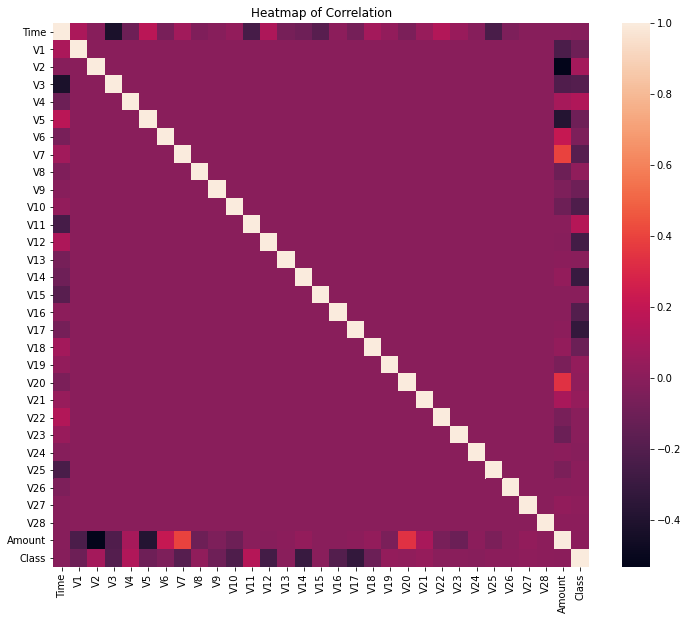

In [8]:
#heatmap
"""
corr = transactions.cor()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

transactions.summary()
"""

transactions_pd = pd.read_csv("creditcard.csv")

corr = transactions_pd.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')


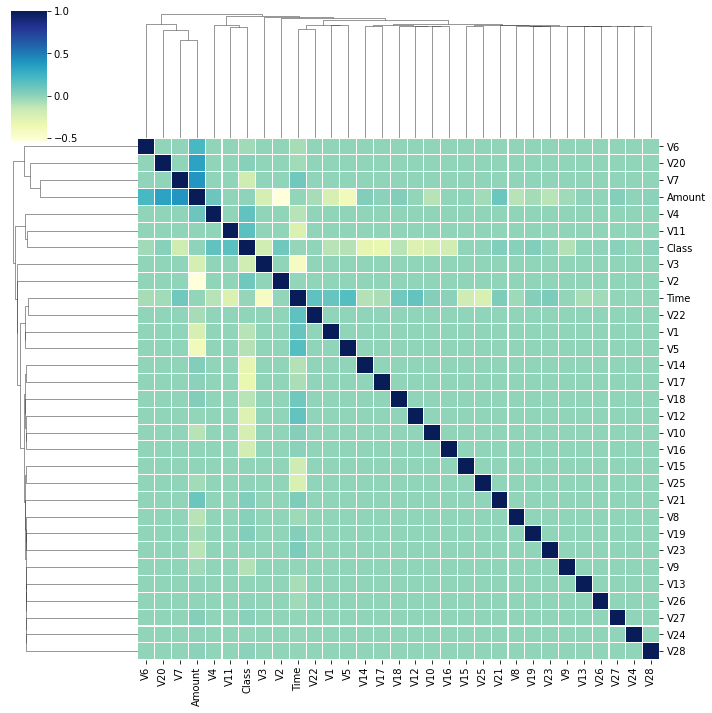

In [9]:
cg = sns.clustermap(corr, cmap ="YlGnBu", linewidths = 0.1); 
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0)
cg

In [12]:
transactions.describe()

Rows:284807
Cols:31




,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
type,int,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,int
mins,0.0,-56.407509631329,-72.7157275629303,-48.3255893623954,-5.68317119816995,-113.743306711146,-26.1605059358433,-43.5572415712451,-73.2167184552674,-13.4340663182301,-24.5882624372475,-4.79747346479757,-18.6837146333443,-5.79188120632084,-19.2143254902614,-4.49894467676621,-14.1298545174931,-25.1627993693248,-9.49874592104677,-7.21352743017759,-54.497720494566,-34.8303821448146,-10.933143697655,-44.8077352037913,-2.83662691870341,-10.2953970749851,-2.60455055280817,-22.5656793207827,-15.4300839055349,0.0,0.0
mean,94813.85957508073,1.0729729950306835e-15,4.151383611725859e-16,-1.0218790428863653e-15,2.030984597736651e-15,1.0218790428863653e-15,1.4178571720048319e-15,-6.003539376957396e-16,1.4050836839687523e-16,-2.5163771431076743e-15,2.208216744237255e-15,1.788288325051139e-15,-1.1687741553012803e-15,7.983430022549729e-16,1.0985199711028427e-15,4.981660334071031e-15,1.4210505440138517e-15,-3.5127092099218805e-16,1.0154922988683254e-15,1.0234757288908752e-15,6.259009137678988e-16,1.6605534446903437e-16,-3.5765766501022783e-16,2.7462999277571067e-16,4.471519155630103e-15,4.981660334071031e-16,1.7004705948030921e-15,-3.6883446704179744e-16,-1.2114855059219213e-16,88.34961925093133,0.001727485630620034
maxs,172792.0,2.45492999121121,22.0577289904909,9.38255843282114,16.8753440335975,34.8016658766686,73.3016255459646,120.589493945238,20.0072083651213,15.5949946071278,23.7451361206545,12.0189131816199,7.8483920756446,7.12688295859376,10.5267660517847,8.87774159774277,17.3151115176278,9.25352625047285,5.04106918541184,5.59197142733558,39.4209042482199,27.2028391573154,10.5030900899454,22.5284116897749,4.58454913689817,7.51958867870916,3.5173456116238,31.6121981061363,33.8478078188831,25691.16,1.0
sigma,47488.1459545662,1.958695803857486,1.651308579476997,1.5162550051777715,1.415868574940921,1.3802467340314395,1.3322710897575751,1.237093598182666,1.1943529026692037,1.098632089224319,1.0888497654025173,1.0207130277115588,0.9992013895301448,0.995274230125153,0.9585956112570637,0.9153160116104393,0.8762528873883704,0.8493370636743893,0.8381762095288414,0.8140405007685785,0.7709250248871169,0.7345240143713133,0.7257015604409116,0.6244602955949903,0.60564706782716,0.5212780705409424,0.4822270132610575,0.4036324949650307,0.33008326416025097,250.12010924018855,0.041527189635465055
zeros,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1825,284315
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.0,-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,0.0907941719789316,-0.551599533260813,-0.617800855762348,-0.991389847235408,-0.311169353699879,1.46817697209427,-0.470400525259478,0.207971241929242,0.0257905801985591,0.403992960255733,0.251412098239705,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62,0.0
1,0.0,1.19185711131486,0.26615071205963,0.16648011335321,0.448154078460911,0.0600176492822243,-0.0823608088155687,-0.0788029833323113,0.0851016549148104,-0.255425128109186,-0.166974414004614,1.61272666105479,1.06523531137287,0.48909501589608,-0.143772296441519,0.635558093258208,0.463917041022171,-0.114804663102346,-0.183361270123994,-0.145783041325259,-0.0690831352230203,-0.225775248033138,-0.638671952771851,0.101288021253234,-0.339846475529127,0.167170404418143,0.125894532368176,-0.00898309914322813,0.0147241691924927,2.69,0.0
2,1.0,-1.35835406159823,-1.34016307473609,1.77320934263119,0.379779593034328,-0.503198133318193,1.80049938079263,0.791460956450422,0.247675786588991,-1.51465432260583,0.207642865216696,0.62450145

In [50]:
x = transactions_pd.iloc[:,1 : 29]

In [53]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc1'])


In [54]:
principalDf

,pc1,pc1
0,1.359744,0.073145
1,-1.191737,-0.265372
2,1.358460,1.341241
3,0.966297,0.184737
4,1.158303,-0.877740
...,...,...
284802,11.880805,-10.071001
284803,0.732867,0.055785
284804,-1.919533,0.301874
284805,0.240301,-0.529700


In [42]:
# Set the predictors:
predictors = transactions[1:29].names
predictors

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28']

In [43]:
#dropping old amount and time columns
# transactions = transactions.drop(['Amount', 'Time'], axis=1)
# transactions['Class'] = transactions['Class'].asfactor()
transactions.summary()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
type,int,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,int
mins,0.0,-56.407509631329,-72.7157275629303,-48.3255893623954,-5.68317119816995,-113.743306711146,-26.1605059358433,-43.5572415712451,-73.2167184552674,-13.4340663182301,-24.5882624372475,-4.79747346479757,-18.6837146333443,-5.79188120632084,-19.2143254902614,-4.49894467676621,-14.1298545174931,-25.1627993693248,-9.49874592104677,-7.21352743017759,-54.497720494566,-34.8303821448146,-10.933143697655,-44.8077352037913,-2.83662691870341,-10.2953970749851,-2.60455055280817,-22.5656793207827,-15.4300839055349,0.0,0.0
mean,94813.85957508064,1.1751608993193201e-15,2.8421010880277033e-16,-1.4306306600409113e-15,2.030984597736651e-15,1.1240669471750018e-15,1.4753378681671898e-15,-5.237130094792622e-16,8.302767223451719e-17,-2.471669934981396e-15,2.171492966133526e-15,1.8138353011232985e-15,-1.1943211313734394e-15,8.334700943541917e-16,1.057006134985584e-15,4.802831501565917e-15,1.4545809501085606e-15,-3.736245250553273e-16,9.835585787781266e-16,1.0218790428863653e-15,6.514478898400579e-16,1.564752284419747e-16,-3.065637128659096e-16,2.4269627268551175e-16,4.464334068609808e-15,4.726190573349439e-16,1.6829070487534827e-15,-3.6354544465185827e-16,-1.1895310733599096e-16,88.3496192509313,0.001727485630620034
maxs,172792.0,2.45492999121121,22.0577289904909,9.38255843282114,16.8753440335975,34.8016658766686,73.3016255459646,120.589493945238,20.0072083651213,15.5949946071278,23.7451361206545,12.0189131816199,7.8483920756446,7.12688295859376,10.5267660517847,8.87774159774277,17.3151115176278,9.25352625047285,5.04106918541184,5.59197142733558,39.4209042482199,27.2028391573154,10.5030900899454,22.5284116897749,4.58454913689817,7.51958867870916,3.5173456116238,31.6121981061363,33.8478078188831,25691.16,1.0
sigma,47488.14595456615,1.958695803857486,1.6513085794769973,1.5162550051777715,1.4158685749409199,1.3802467340314397,1.3322710897575754,1.2370935981826663,1.1943529026692037,1.0986320892243193,1.0888497654025169,1.0207130277115588,0.9992013895301448,0.9952742301251535,0.9585956112570636,0.9153160116104393,0.8762528873883703,0.8493370636743892,0.8381762095288416,0.8140405007685786,0.7709250248871167,0.7345240143713131,0.7257015604409116,0.6244602955949901,0.60564706782716,0.5212780705409424,0.4822270132610574,0.4036324949650307,0.3300832641602509,250.12010924018853,0.041527189635465055
zeros,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1825,284315
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.0,-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,0.0907941719789316,-0.551599533260813,-0.617800855762348,-0.991389847235408,-0.311169353699879,1.46817697209427,-0.470400525259478,0.207971241929242,0.0257905801985591,0.403992960255733,0.251412098239705,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62,0.0
1,0.0,1.19185711131486,0.26615071205963,0.16648011335321,0.448154078460911,0.0600176492822243,-0.0823608088155687,-0.0788029833323113,0.0851016549148104,-0.255425128109186,-0.166974414004614,1.61272666105479,1.06523531137287,0.48909501589608,-0.143772296441519,0.635558093258208,0.463917041022171,-0.114804663102346,-0.183361270123994,-0.145783041325259,-0.0690831352230203,-0.225775248033138,-0.638671952771851,0.101288021253234,-0.339846475529127,0.167170404418143,0.125894532368176,-0.00898309914322813,0.0147241691924927,2.69,0.0
2,1.0,-1.35835406159823,-1.34016307473609,1.77320934263119,0.379779593034328,-0.503198133318193,1.80049938079263,0.791460956450422,0.247675786588991,-1.51465432260583,0.207642865216696,0.624501459

In [44]:
# Split the dataset into a train and valid set:
train, valid = transactions.split_frame(ratios=[.7], seed=1234)
len(valid)

85222

In [47]:
# Build and train the model:
tr_kmeans = H2OKMeansEstimator(k=2,
                                 estimate_k=True,
                                 standardize=True,
                                 seed=1234)

In [48]:
tr_kmeans.train(x=predictors,
                  training_frame=train,
                  validation_frame=valid)

# Eval performance:
perf = tr_kmeans.model_performance()

#  Generate predictions on a validation set (if necessary):
pred = tr_kmeans.predict(valid)

kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans prediction progress: |█████████████████████████████████████████████| 100%


predict,Count
0,37348
1,47874


In [49]:
# Eval performance:
pred.table()

predict,Count
0,37348
1,47874


In [87]:
# Training random forest
trans_forest= H2ORandomForestEstimator(ntrees=10,
                                    max_depth=5,
                                    min_rows=10,
                                    calibrate_model=True,
                                    calibration_frame=valid,
                                    binomial_double_trees=True)


In [90]:
response = "Class"

In [91]:
trans_forest.train(x=predictors,
               y=response,
               training_frame=train,
               validation_frame=valid)



drf Model Build progress: |███████████████████████████████████████████████| 100%


In [96]:
# Eval performance:
perf = trans_forest.model_performance()

# # Generate predictions on a validation set (if necessary):
pred = trans_forest.predict(valid)


drf prediction progress: |████████████████████████████████████████████████| 100%


predict,p0,p1,cal_p0,cal_p1
0,0.999755,0.000245037,0.999623,0.000377456
0,0.999755,0.000245037,0.999623,0.000377456
0,0.999755,0.000245037,0.999623,0.000377456
0,0.999755,0.000245037,0.999623,0.000377456
0,0.999755,0.000245037,0.999623,0.000377456
0,0.999755,0.000245037,0.999623,0.000377456
0,0.999755,0.000245037,0.999623,0.000377456
0,0.999755,0.000245037,0.999623,0.000377456
0,0.99918,0.000820371,0.999619,0.000380865
0,0.999246,0.000754484,0.99962,0.000380473


In [98]:
# predictions
pred["predict"].table()

predict,Count
0,85086
1,136


In [100]:
# validation data
valid["Class"].table()

Class,Count
0,85071
1,151
